# Sentiment Analysis Python Project: Avenged Sevenfold - Life Is But A Dream (2023) album

This notebook tells about how to get song lyrics using web scraping and do the sentiment analysis on the song lyrics.

## Import Packages

In [15]:
# Import necessary Python libraries
from config import GENIUS_CONFIG

# import system package
import os
import glob

# import Web Scraping packages to get all the song titles for a specific album
import re
import requests
import lyricsgenius
from bs4 import BeautifulSoup
from pathlib import Path

# import data manipulation package
import pandas as pd

In [2]:
# Get token
client_access_token = GENIUS_CONFIG['client_access_token']

## Song Lyrics Collection using lyricsgenius to access Genius API

In [3]:
# Using lyricsgenius token to search artist songs
genius = lyricsgenius.Genius(client_access_token)

In [4]:
# Get Songs and Lyrics By a Specific Artist
search_artist = "Avenged Sevenfold"
artist = genius.search_artist(search_artist, max_songs = 5)
print(artist)

Searching for songs by Avenged Sevenfold...

Song 1: "A Little Piece of Heaven"
Song 2: "So Far Away"
Song 3: "Hail to the King"
Song 4: "Nightmare"
Song 5: "Dear God"

Reached user-specified song limit (5).
Done. Found 5 songs.
Avenged Sevenfold, 5 songs


In [5]:
# access these lyrics in each of those songs
for song in artist.songs:
    print(song.lyrics)

102 ContributorsTranslationsEspañolA Little Piece of Heaven Lyrics[Intro: M. Shadows]
Before the story begins
Is it such a sin
For me to take what's mine
Until the end of time?
We were more than friends
Before the story ends
And I will take what's mine
Create what God would never design

[Verse 1: M. Shadows & The Rev]
Our love had been so strong for far too long
I was weak with fear that somethin' would go wrong
Before the possibilities came true
I took all possibility from you
Almost laughed myself to tears (Ahahaha)
Conjuring her deepest fears (Come here, you fuckin' bitch)

[Refrain: The Rev, The Rev & M. Shadows, M. Shadows]
Must have stabbed her fifty fucking times
I can't believe it
Ripped her heart out right before her eyes
Eyes over easy
Eat it, eat it, eat it
She was never this good in bed even when she was sleepin'
Now she's just so perfect, I've never been quite so fuckin' deep in
See Avenged Sevenfold LiveGet tickets as low as $58You might also like[Pre-Chorus: M. Shadows]

## Create Function to Get Songs and Lyrics for a Specific Album

In [6]:
# Make RegEx function to clean up songs
def clean_up(song_title):
    # Check if "featuring" / "Ft" is in the song title
    if "Ft" in song_title:
        # Create a RegEx pattern to extract the part of the song title before "(Ft)"
        before_ft_pattern = re.compile(".*(?=\(Ft))")

        # Search for the pattern in the song title and extract the matched group
        song_title_before_ft = before_ft_pattern.search(song_title).group(0)
        
        # Strip any leading or trailing whitespaces from the extracted part
        clean_song_title = song_title_before_ft.strip()

        # Replace any '/' with '-' in the cleaned song title
        clean_song_title = clean_song_title.replace("/", "-")

    else:
        # Remove the word "Lyrics" from the song title
        song_title_no_lyrics = song_title.replace("Lyrics", "")

        # Strip any leading or trailing whitespaces from the modified song title
        clean_song_title = song_title_no_lyrics.strip()

        # Replace any '/' with '-' in the cleaned song title
        clean_song_title = clean_song_title.replace("/", "-")

    # Return the cleaned up song title
    return clean_song_title

In [7]:
# Make function to scrape song titles for Album
def get_all_songs_from_album(artist, album_name):
    # Replace spaces with hyphens in the artist name for URL formatting
    artist = artist.replace(" ", "-")
    # Replace spaces with hyphens in the album name for URL formatting
    album_name = album_name.replace(" ", "-")

    # Send a GET request to the Genius.com album page
    response = requests.get(f"https://genius.com/albums/{artist}/{album_name}")
    # Get the HTML content of the page as a string
    html_string = response.text
    # Parse the HTML content with BeautifulSoup
    document = BeautifulSoup(html_string, "html.parser")
    # Find all <h3> tags with the class "chart_row-content-title"
    song_title_tags = document.find_all("h3", attrs = {
        "class":"chart_row-content-title"
    })
    # Extract the text from each <h3> tag and create a list of song titles
    song_titles = [song_title.text for song_title in song_title_tags]

    # Initialize an empty list to hold cleaned song titles
    clean_songs = []
    # Iterate over each song title to clean up the text
    for song_title in song_titles:
        # Call a hypothetical clean_up function to clean the song title
        clean_song = clean_up(song_title)
        # Append the cleaned song title to the list
        clean_songs.append(clean_song)

    # Return the list of cleaned song titles
    return clean_songs

In [8]:
# Make function to download lyrics for all songs in album
def download_album_lyrics(artist, album_name): 
    
    # Set up LyricsGenius with your Genius API client access token
    #client_access_token = Your-Client-Access-Token
    genius = lyricsgenius.Genius(client_access_token)
    genius.remove_section_headers = True
    
    # With the function that we previously created, go to Genius.com and get all song titles for a particular artist's album
    clean_songs = get_all_songs_from_album(artist, album_name)
    
    for song in clean_songs:
        
        # For each song in the list, search for that song with LyricsGenius
        song_object = genius.search_song(song, artist)
        
        # If the song is not empty
        if song_object != None:
            
            # Do some cleaning and prep for the filename of the song
            artist_title = artist.replace(" ", "-")
            album_title = album_name.replace(" ", "-")
            song_title = song.replace("/", "-")
            song_title = song.replace(" ", "-")
            
            # Establish the filename for each song inside a directory that begins with the artist's name and album title
            custom_filename=f"{artist_title}_{album_title}/{song_title}"
            
            # A line of code that we need to create a directory
            Path(f"{artist_title}_{album_title}").mkdir(parents=True, exist_ok=True)
            
            # Save the lyrics for the song as a text file
            song_object.save_lyrics(filename=custom_filename, extension='txt', sanitize=False)
        
        # If the song doesn't contain lyrics
        else:
            print('No lyrics')

## Get songs and lyrics in the album Life Is But A Dream (2023) by Avenged Sevenfold

In [9]:
# Call the function
download_album_lyrics(search_artist, "Life is But a Dream")

Searching for "Game Over" by Avenged Sevenfold...
Done.
Wrote Avenged-Sevenfold_Life-is-But-a-Dream/Game-Over.txt.
Searching for "Mattel" by Avenged Sevenfold...
Done.
Wrote Avenged-Sevenfold_Life-is-But-a-Dream/Mattel.txt.
Searching for "Nobody" by Avenged Sevenfold...
Done.
Wrote Avenged-Sevenfold_Life-is-But-a-Dream/Nobody.txt.
Searching for "We Love You" by Avenged Sevenfold...
Done.
Wrote Avenged-Sevenfold_Life-is-But-a-Dream/We-Love-You.txt.
Searching for "Cosmic" by Avenged Sevenfold...
Done.
Wrote Avenged-Sevenfold_Life-is-But-a-Dream/Cosmic.txt.
Searching for "Beautiful Morning" by Avenged Sevenfold...
Done.
Wrote Avenged-Sevenfold_Life-is-But-a-Dream/Beautiful-Morning.txt.
Searching for "Easier" by Avenged Sevenfold...
Done.
Wrote Avenged-Sevenfold_Life-is-But-a-Dream/Easier.txt.
Searching for "G" by Avenged Sevenfold...
Done.
Wrote Avenged-Sevenfold_Life-is-But-a-Dream/G.txt.
Searching for "(O)rdinary" by Avenged Sevenfold...
Done.
Wrote Avenged-Sevenfold_Life-is-But-a-Dream

All lyrics are saved individually to mitigate risk during the sentiment analysis process and for private collections of each song's lyrics.

## Combine all txt files into a single data frame

### Read the content of each .txt file

In [55]:
# Get the current working directory
main_directory = os.getcwd()

In [247]:
# List to store the content of each file
libad_album = []

# Loop through each subfolder in the main directory
for folder in os.listdir(main_directory):
    folder_path = os.path.join(main_directory, folder)
    if os.path.isdir(folder_path) and folder.endswith('_Genius'):
        # Extract metadata from the folder name
        artist_name, album_name, _ = folder.split('_')

        # Find all .txt files in the current folder
        txt_files = glob.glob(os.path.join(folder_path, '*.txt'))

        # read each .txt file and store its content along with metadata
        for txt_file in txt_files:
            with open(txt_file, 'r') as file:
                content = file.readlines()
                song_name = os.path.basename(txt_file)
                libad_album.append({'song_name': song_name.replace("-", " ").replace(".txt", ""), 
                                    'lyrics': ''.join([sub.replace("\n", ". ") for sub in content]),
                                    'artist_name': artist_name.replace("-", " "),
                                    'album_name': album_name.replace("-", " ")})

# Create d DataFrame from the list of dictionaries
df_album = pd.DataFrame(libad_album).reset_index().rename(columns={'index': 'Id'})

In [248]:
df_album

,Id,song_name,lyrics,artist_name,album_name
0,0,(D)eath,In my dreams. I awake as daylight breaks and w...,Avenged Sevenfold,Life is But a Dream
1,1,(O)rdinary,Will you give me my own soul?. Will you let me...,Avenged Sevenfold,Life is But a Dream
2,2,Beautiful Morning,I sit stoic. Touch of the divine upon my neck....,Avenged Sevenfold,Life is But a Dream
3,3,Cosmic,Fade from all that was before. We shut another...,Avenged Sevenfold,Life is But a Dream
4,4,Easier,It's easier to just walk away. I know you'll s...,Avenged Sevenfold,Life is But a Dream
5,5,G,"I am the man. Six days of bullshit, a wave of ...",Avenged Sevenfold,Life is But a Dream
6,6,Game Over,"Open, blurry, nurture, loving. Crawling, walki...",Avenged Sevenfold,Life is But a Dream
7,7,Mattel,My vinyl skin provides protection. It holds in...,Avenged Sevenfold,Life is But a Dream
8,8,Nobody,"Ride in the shadows, wandering beyond the brai...",Avenged Sevenfold,Life is But a Dream
9,9,We Love You,"There you are, you've come so far. Sunny days,...",Avenged Sevenfold,Life is But a Dream


In [249]:
# # Save DataFrame to a pickle file
df_album.to_pickle('libad.pkl')

In [250]:
# Load DataFrame from a pickle file
df_album = pd.read_pickle('libad.pkl')
df_album

,Id,song_name,lyrics,artist_name,album_name
0,0,(D)eath,In my dreams. I awake as daylight breaks and w...,Avenged Sevenfold,Life is But a Dream
1,1,(O)rdinary,Will you give me my own soul?. Will you let me...,Avenged Sevenfold,Life is But a Dream
2,2,Beautiful Morning,I sit stoic. Touch of the divine upon my neck....,Avenged Sevenfold,Life is But a Dream
3,3,Cosmic,Fade from all that was before. We shut another...,Avenged Sevenfold,Life is But a Dream
4,4,Easier,It's easier to just walk away. I know you'll s...,Avenged Sevenfold,Life is But a Dream
5,5,G,"I am the man. Six days of bullshit, a wave of ...",Avenged Sevenfold,Life is But a Dream
6,6,Game Over,"Open, blurry, nurture, loving. Crawling, walki...",Avenged Sevenfold,Life is But a Dream
7,7,Mattel,My vinyl skin provides protection. It holds in...,Avenged Sevenfold,Life is But a Dream
8,8,Nobody,"Ride in the shadows, wandering beyond the brai...",Avenged Sevenfold,Life is But a Dream
9,9,We Love You,"There you are, you've come so far. Sunny days,...",Avenged Sevenfold,Life is But a Dream


## Sentiment Analysis in Each Song Separately

In this notebook, the writer will be doing some sentiment analysis in python using 2 different techniques: 
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. RoBERTa (Robustly optimized BERT approach) Pretrained Model from Huggingface  

In [251]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
nltk.download(["stopwords","vader_lexicon","punkt","wordnet"])
import string
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from transformers import pipeline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\096944\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\096944\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\096944\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\096944\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [252]:
# Creating stopword list from nltk
stop_words = stopwords.words('english')

# Reviewing stop_words
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [253]:
# reviewing length of extended stopword list
len(stop_words)

179

Using preprocessing text on lyrics

In [254]:
def clean_lyrics(df, column_name, stop_words):
    """
    Clean the lyrics in the specified DataFrame column by removing punctuation,
    converting to lowercase, removing stop words, and applying lemmatizing.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the lyrics.
    column_name (str): The name of the column containing the lyrics.
    stop_words (list): A list of stop words to remove from the lyrics.

    Returns:
    pd.DataFrame: The DataFrame with an additional column 'lyrics_cleaned'.
    """
    
    # Make sure the lyrics are string
    df[column_name] = df[column_name].astype(str)

    # Define the RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')

    # Apply the translation table to the column
    df['lyrics_cleaned'] = df[column_name].apply(lambda x: tokenizer.tokenize(x.lower()))

    # Removing stop words from the lyrics token
    df['lyrics_cleaned'] = df['lyrics_cleaned'].apply(lambda x: [w for w in x if w not in stop_words])

    # Apply lemmatizing
    lemmatizer = WordNetLemmatizer()
    df['lyrics_cleaned'] = df['lyrics_cleaned'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

    return df

In [255]:
# Apply the function
df_album = clean_lyrics(df_album, 'lyrics', stop_words)

# Show the result
df_album

,Id,song_name,lyrics,artist_name,album_name,lyrics_cleaned
0,0,(D)eath,In my dreams. I awake as daylight breaks and w...,Avenged Sevenfold,Life is But a Dream,"[dream, awake, daylight, break, wash, face, pu..."
1,1,(O)rdinary,Will you give me my own soul?. Will you let me...,Avenged Sevenfold,Life is But a Dream,"[give, soul, let, take, control, wanna, see, t..."
2,2,Beautiful Morning,I sit stoic. Touch of the divine upon my neck....,Avenged Sevenfold,Life is But a Dream,"[sit, stoic, touch, divine, upon, neck, lay, g..."
3,3,Cosmic,Fade from all that was before. We shut another...,Avenged Sevenfold,Life is But a Dream,"[fade, shut, another, door, last, goodbye, fat..."
4,4,Easier,It's easier to just walk away. I know you'll s...,Avenged Sevenfold,Life is But a Dream,"[easier, walk, away, know, see, brighter, day,..."
5,5,G,"I am the man. Six days of bullshit, a wave of ...",Avenged Sevenfold,Life is But a Dream,"[man, six, day, bullshit, wave, hand, know, ne..."
6,6,Game Over,"Open, blurry, nurture, loving. Crawling, walki...",Avenged Sevenfold,Life is But a Dream,"[open, blurry, nurture, loving, crawling, walk..."
7,7,Mattel,My vinyl skin provides protection. It holds in...,Avenged Sevenfold,Life is But a Dream,"[vinyl, skin, provides, protection, hold, plac..."
8,8,Nobody,"Ride in the shadows, wandering beyond the brai...",Avenged Sevenfold,Life is But a Dream,"[ride, shadow, wandering, beyond, brain, float..."
9,9,We Love You,"There you are, you've come so far. Sunny days,...",Avenged Sevenfold,Life is But a Dream,"[come, far, sunny, day, air, taste, sweet, flo..."


### 1. VADER Scoring

In [256]:
# call function SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [257]:
# turn column into string in order to apply polarity scores
df_album['new_lyrics_cleaned'] = [' '.join(map(str, l)) for l in df_album['lyrics_cleaned']]
df_album

,Id,song_name,lyrics,artist_name,album_name,lyrics_cleaned,new_lyrics_cleaned
0,0,(D)eath,In my dreams. I awake as daylight breaks and w...,Avenged Sevenfold,Life is But a Dream,"[dream, awake, daylight, break, wash, face, pu...",dream awake daylight break wash face put bedro...
1,1,(O)rdinary,Will you give me my own soul?. Will you let me...,Avenged Sevenfold,Life is But a Dream,"[give, soul, let, take, control, wanna, see, t...",give soul let take control wanna see thing see...
2,2,Beautiful Morning,I sit stoic. Touch of the divine upon my neck....,Avenged Sevenfold,Life is But a Dream,"[sit, stoic, touch, divine, upon, neck, lay, g...",sit stoic touch divine upon neck lay gently ta...
3,3,Cosmic,Fade from all that was before. We shut another...,Avenged Sevenfold,Life is But a Dream,"[fade, shut, another, door, last, goodbye, fat...",fade shut another door last goodbye fate taken...
4,4,Easier,It's easier to just walk away. I know you'll s...,Avenged Sevenfold,Life is But a Dream,"[easier, walk, away, know, see, brighter, day,...",easier walk away know see brighter day along w...
5,5,G,"I am the man. Six days of bullshit, a wave of ...",Avenged Sevenfold,Life is But a Dream,"[man, six, day, bullshit, wave, hand, know, ne...",man six day bullshit wave hand know need put h...
6,6,Game Over,"Open, blurry, nurture, loving. Crawling, walki...",Avenged Sevenfold,Life is But a Dream,"[open, blurry, nurture, loving, crawling, walk...",open blurry nurture loving crawling walking fl...
7,7,Mattel,My vinyl skin provides protection. It holds in...,Avenged Sevenfold,Life is But a Dream,"[vinyl, skin, provides, protection, hold, plac...",vinyl skin provides protection hold place plas...
8,8,Nobody,"Ride in the shadows, wandering beyond the brai...",Avenged Sevenfold,Life is But a Dream,"[ride, shadow, wandering, beyond, brain, float...",ride shadow wandering beyond brain floatin lik...
9,9,We Love You,"There you are, you've come so far. Sunny days,...",Avenged Sevenfold,Life is But a Dream,"[come, far, sunny, day, air, taste, sweet, flo...",come far sunny day air taste sweet flower gree...


In [258]:
# Run the polarity score on the entire dataset using cleaned text lyrics
res = {}
for index, row in tqdm(df_album.iterrows(), total = len(df_album)):
    text = row['new_lyrics_cleaned']
    myid = index
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/10 [00:00<?, ?it/s]

In [259]:
# Transpose the dataset
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df_album, how = 'left')

In [260]:
# Appending the sentiment result
vaders.loc[vaders.compound>0, 'sentiment'] = 'positive'
vaders.loc[vaders.compound==0, 'sentiment'] = 'neutral'
vaders.loc[vaders.compound<0, 'sentiment'] = 'negative'
vaders

,Id,neg,neu,pos,compound,song_name,lyrics,artist_name,album_name,lyrics_cleaned,new_lyrics_cleaned,sentiment
0,0,0.161,0.625,0.214,0.2533,(D)eath,In my dreams. I awake as daylight breaks and w...,Avenged Sevenfold,Life is But a Dream,"[dream, awake, daylight, break, wash, face, pu...",dream awake daylight break wash face put bedro...,positive
1,1,0.036,0.736,0.228,0.8464,(O)rdinary,Will you give me my own soul?. Will you let me...,Avenged Sevenfold,Life is But a Dream,"[give, soul, let, take, control, wanna, see, t...",give soul let take control wanna see thing see...,positive
2,2,0.102,0.663,0.235,0.9719,Beautiful Morning,I sit stoic. Touch of the divine upon my neck....,Avenged Sevenfold,Life is But a Dream,"[sit, stoic, touch, divine, upon, neck, lay, g...",sit stoic touch divine upon neck lay gently ta...,positive
3,3,0.140,0.730,0.130,0.1421,Cosmic,Fade from all that was before. We shut another...,Avenged Sevenfold,Life is But a Dream,"[fade, shut, another, door, last, goodbye, fat...",fade shut another door last goodbye fate taken...,positive
4,4,0.042,0.598,0.361,0.9796,Easier,It's easier to just walk away. I know you'll s...,Avenged Sevenfold,Life is But a Dream,"[easier, walk, away, know, see, brighter, day,...",easier walk away know see brighter day along w...,positive
5,5,0.089,0.541,0.370,0.9935,G,"I am the man. Six days of bullshit, a wave of ...",Avenged Sevenfold,Life is But a Dream,"[man, six, day, bullshit, wave, hand, know, ne...",man six day bullshit wave hand know need put h...,positive
6,6,0.177,0.517,0.306,0.9805,Game Over,"Open, blurry, nurture, loving. Crawling, walki...",Avenged Sevenfold,Life is But a Dream,"[open, blurry, nurture, loving, crawling, walk...",open blurry nurture loving crawling walking fl...,positive
7,7,0.182,0.703,0.115,-0.9001,Mattel,My vinyl skin provides protection. It holds in...,Avenged Sevenfold,Life is But a Dream,"[vinyl, skin, provides, protection, hold, plac...",vinyl skin provides protection hold place plas...,negative
8,8,0.184,0.624,0.193,-0.5204,Nobody,"Ride in the shadows, wandering beyond the brai...",Avenged Sevenfold,Life is But a Dream,"[ride, shadow, wandering, beyond, brain, float...",ride shadow wandering beyond brain floatin lik...,negative
9,9,0.068,0.687,0.246,0.9870,We Love You,"There you are, you've come so far. Sunny days,...",Avenged Sevenfold,Life is But a Dream,"[come, far, sunny, day, air, taste, sweet, flo...",come far sunny day air taste sweet flower gree...,positive


In [261]:
# Count the amount of words in each song and store it in a new column 'word_count'
vaders['word_count'] = vaders['new_lyrics_cleaned'].str.split().str.len()
vaders

,Id,neg,neu,pos,compound,song_name,lyrics,artist_name,album_name,lyrics_cleaned,new_lyrics_cleaned,sentiment,word_count
0,0,0.161,0.625,0.214,0.2533,(D)eath,In my dreams. I awake as daylight breaks and w...,Avenged Sevenfold,Life is But a Dream,"[dream, awake, daylight, break, wash, face, pu...",dream awake daylight break wash face put bedro...,positive,46
1,1,0.036,0.736,0.228,0.8464,(O)rdinary,Will you give me my own soul?. Will you let me...,Avenged Sevenfold,Life is But a Dream,"[give, soul, let, take, control, wanna, see, t...",give soul let take control wanna see thing see...,positive,40
2,2,0.102,0.663,0.235,0.9719,Beautiful Morning,I sit stoic. Touch of the divine upon my neck....,Avenged Sevenfold,Life is But a Dream,"[sit, stoic, touch, divine, upon, neck, lay, g...",sit stoic touch divine upon neck lay gently ta...,positive,133
3,3,0.140,0.730,0.130,0.1421,Cosmic,Fade from all that was before. We shut another...,Avenged Sevenfold,Life is But a Dream,"[fade, shut, another, door, last, goodbye, fat...",fade shut another door last goodbye fate taken...,positive,126
4,4,0.042,0.598,0.361,0.9796,Easier,It's easier to just walk away. I know you'll s...,Avenged Sevenfold,Life is But a Dream,"[easier, walk, away, know, see, brighter, day,...",easier walk away know see brighter day along w...,positive,69
5,5,0.089,0.541,0.370,0.9935,G,"I am the man. Six days of bullshit, a wave of ...",Avenged Sevenfold,Life is But a Dream,"[man, six, day, bullshit, wave, hand, know, ne...",man six day bullshit wave hand know need put h...,positive,121
6,6,0.177,0.517,0.306,0.9805,Game Over,"Open, blurry, nurture, loving. Crawling, walki...",Avenged Sevenfold,Life is But a Dream,"[open, blurry, nurture, loving, crawling, walk...",open blurry nurture loving crawling walking fl...,positive,141
7,7,0.182,0.703,0.115,-0.9001,Mattel,My vinyl skin provides protection. It holds in...,Avenged Sevenfold,Life is But a Dream,"[vinyl, skin, provides, protection, hold, plac...",vinyl skin provides protection hold place plas...,negative,134
8,8,0.184,0.624,0.193,-0.5204,Nobody,"Ride in the shadows, wandering beyond the brai...",Avenged Sevenfold,Life is But a Dream,"[ride, shadow, wandering, beyond, brain, float...",ride shadow wandering beyond brain floatin lik...,negative,145
9,9,0.068,0.687,0.246,0.9870,We Love You,"There you are, you've come so far. Sunny days,...",Avenged Sevenfold,Life is But a Dream,"[come, far, sunny, day, air, taste, sweet, flo...",come far sunny day air taste sweet flower gree...,positive,158


**Plot VADER results**

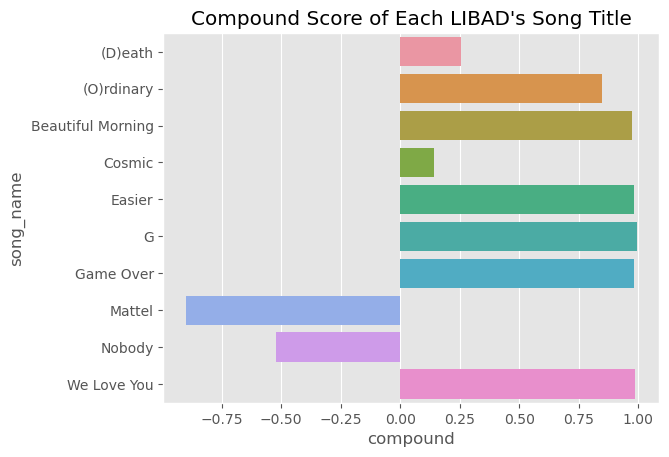

In [262]:
# Plot result using seaborn barplot
ax = sns.barplot(data = vaders,
                 y = 'song_name',
                 x = 'compound')
ax.set_title('Compound Score of Each LIBAD\'s Song Title')
plt.show()

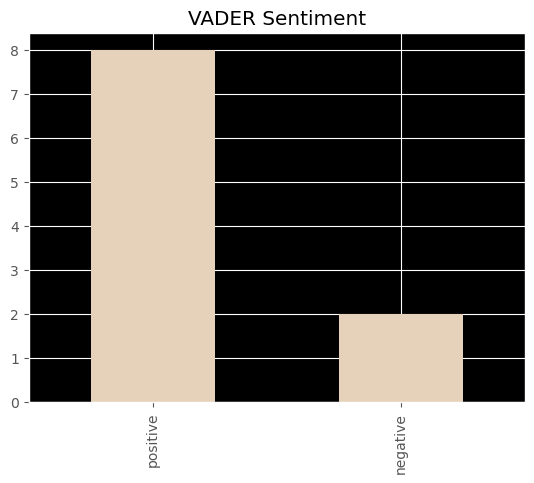

In [263]:
# VADER sentiment
vaders.sentiment.value_counts().plot(kind = 'bar', 
                                     title = "VADER Sentiment", 
                                     color = '#e6d2bb')
ax = plt.gca()
ax.set_facecolor('xkcd:black')

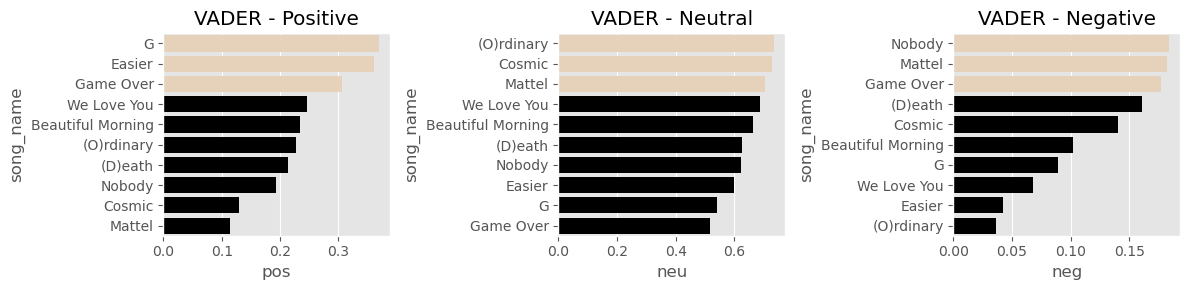

In [276]:
# Sort the DataFrame by each sentiment score
vaders_sorted_pos = vaders.sort_values(by='pos', ascending=False)
vaders_sorted_neu = vaders.sort_values(by='neu', ascending=False)
vaders_sorted_neg = vaders.sort_values(by='neg', ascending=False)

# Define colors
highlight_color = '#e6d2bb'  # Color for highlighting the top 3 bars
default_color = 'black'  # Default color for the rest of the bars

# Plot result using seaborn barplot
fig, axs = plt.subplots(1, 3, figsize = (12, 3))

# Function to plot with highlighted bars
def plot_with_highlight(ax, data, x, y, title):
    sns.barplot(data=data, y=y, x=x, ax=ax, palette=[default_color] * len(data))
    for i in range(3):
        ax.patches[i].set_facecolor(highlight_color)
    ax.set_title(title)

plot_with_highlight(axs[0], vaders_sorted_pos, 'pos', 'song_name', 'VADER - Positive')
plot_with_highlight(axs[1], vaders_sorted_neu, 'neu', 'song_name', 'VADER - Neutral')
plot_with_highlight(axs[2], vaders_sorted_neg, 'neg', 'song_name', 'VADER - Negative')

plt.tight_layout()
plt.show()

### 2. RoBERTa Pretrained Model

RoBERTa (Robustly optimized BERT approach) is an advanced natural language processing (NLP) model developed by Facebook AI. It builds upon the BERT (Bidirectional Encoder Representations from Transformers) model by improving its performance and training methodology.  

- Use a model trained of a large corpus of data.  

- Transformer model accounts for the words but also the context related to other words.

In [265]:
#  Define the model to use for sentiment analysis
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

# Load the tokenizer and model using the specified model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [266]:
# Define a function to compute polarity scores using RoBERTa model
def polarity_scores_roberta(example):
    # Tokenize the input text
    encoded_text = tokenizer(example, return_tensors='pt')
    
    # Get model output
    output = model(**encoded_text)
    
    # Extract the scores and convert to numpy array
    scores = output[0][0].detach().numpy()
    
    # Apply softmax to the scores to get probabilities
    scores = softmax(scores)
    
    # Create a dictionary to store the scores for negative, neutral, and positive sentiments
    scores_dict = {
        'roberta_neg' : scores[0],  # Negative sentiment score
        'roberta_neu' : scores[1],  # Neutral sentiment score
        'roberta_pos' : scores[2]   # Positive sentiment score
    }
    
    # Return the dictionary of scores
    return scores_dict

In [267]:
res = {}
for i, row in tqdm(df_album.iterrows(), total=len(df_album)):
    try:
        text = row['new_lyrics_cleaned']
        myid = row['Id']

        # iterate dataframe to compute lyrics with VADER
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        # iterate dataframe to compute lyrics with RoBERTa
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/10 [00:00<?, ?it/s]

In [268]:
# Merge the RoBERTa result to df_album
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df_album, how='left')

In [270]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,song_name,lyrics,artist_name,album_name,lyrics_cleaned,new_lyrics_cleaned
0,0,0.161,0.625,0.214,0.2533,0.104707,0.773519,0.121774,(D)eath,In my dreams. I awake as daylight breaks and w...,Avenged Sevenfold,Life is But a Dream,"[dream, awake, daylight, break, wash, face, pu...",dream awake daylight break wash face put bedro...
1,1,0.036,0.736,0.228,0.8464,0.046751,0.662126,0.291123,(O)rdinary,Will you give me my own soul?. Will you let me...,Avenged Sevenfold,Life is But a Dream,"[give, soul, let, take, control, wanna, see, t...",give soul let take control wanna see thing see...
2,2,0.102,0.663,0.235,0.9719,0.020695,0.696939,0.282366,Beautiful Morning,I sit stoic. Touch of the divine upon my neck....,Avenged Sevenfold,Life is But a Dream,"[sit, stoic, touch, divine, upon, neck, lay, g...",sit stoic touch divine upon neck lay gently ta...
3,3,0.140,0.730,0.130,0.1421,0.089942,0.709444,0.200614,Cosmic,Fade from all that was before. We shut another...,Avenged Sevenfold,Life is But a Dream,"[fade, shut, another, door, last, goodbye, fat...",fade shut another door last goodbye fate taken...
4,4,0.042,0.598,0.361,0.9796,0.027944,0.399869,0.572187,Easier,It's easier to just walk away. I know you'll s...,Avenged Sevenfold,Life is But a Dream,"[easier, walk, away, know, see, brighter, day,...",easier walk away know see brighter day along w...
5,5,0.089,0.541,0.370,0.9935,0.288614,0.523303,0.188082,G,"I am the man. Six days of bullshit, a wave of ...",Avenged Sevenfold,Life is But a Dream,"[man, six, day, bullshit, wave, hand, know, ne...",man six day bullshit wave hand know need put h...
6,6,0.177,0.517,0.306,0.9805,0.130482,0.603036,0.266482,Game Over,"Open, blurry, nurture, loving. Crawling, walki...",Avenged Sevenfold,Life is But a Dream,"[open, blurry, nurture, loving, crawling, walk...",open blurry nurture loving crawling walking fl...
7,7,0.182,0.703,0.115,-0.9001,0.436970,0.505391,0.057639,Mattel,My vinyl skin provides protection. It holds in...,Avenged Sevenfold,Life is But a Dream,"[vinyl, skin, provides, protection, hold, plac...",vinyl skin provides protection hold place plas...
8,8,0.184,0.624,0.193,-0.5204,0.267996,0.690342,0.041662,Nobody,"Ride in the shadows, wandering beyond the brai...",Avenged Sevenfold,Life is But a Dream,"[ride, shadow, wandering, beyond, brain, float...",ride shadow wandering beyond brain floatin lik...
9,9,0.068,0.687,0.246,0.9870,0.046597,0.542761,0.410642,We Love You,"There you are, you've come so far. Sunny days,...",Avenged Sevenfold,Life is But a Dream,"[come, far, sunny, day, air, taste, sweet, flo...",come far sunny day air taste sweet flower gree...


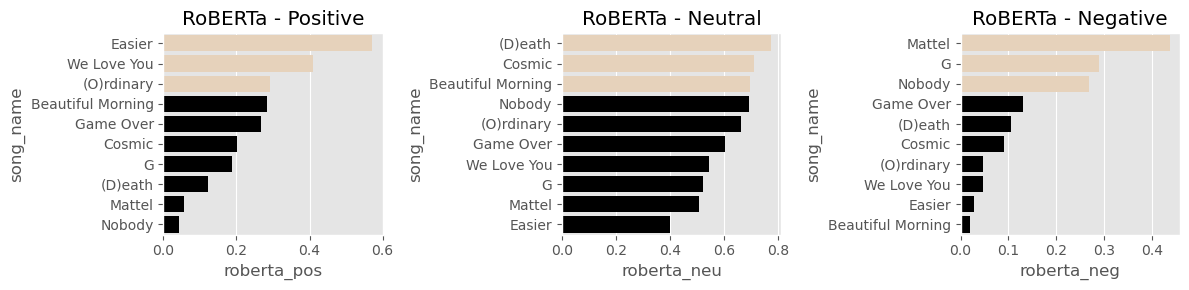

In [278]:
# Sort the DataFrame by each sentiment score
roberta_sorted_pos = results_df.sort_values(by='roberta_pos', ascending=False)
roberta_sorted_neu = results_df.sort_values(by='roberta_neu', ascending=False)
roberta_sorted_neg = results_df.sort_values(by='roberta_neg', ascending=False)

# Define colors
highlight_color = '#e6d2bb'  # Color for highlighting the top 3 bars
default_color = 'black'  # Default color for the rest of the bars

# Plot result using seaborn barplot
fig, axs = plt.subplots(1, 3, figsize = (12, 3))

# Function to plot with highlighted bars
def plot_with_highlight(ax, data, x, y, title):
    sns.barplot(data=data, y=y, x=x, ax=ax, palette=[default_color] * len(data))
    for i in range(3):
        ax.patches[i].set_facecolor(highlight_color)
    ax.set_title(title)

plot_with_highlight(axs[0], roberta_sorted_pos, 'roberta_pos', 'song_name', 'RoBERTa - Positive')
plot_with_highlight(axs[1], roberta_sorted_neu, 'roberta_neu', 'song_name', 'RoBERTa - Neutral')
plot_with_highlight(axs[2], roberta_sorted_neg, 'roberta_neg', 'song_name', 'RoBERTa - Negative')

plt.tight_layout()
plt.show()

### Compare Positive, Neutral, and Negative Sentiment Each Model

In [273]:
# Calculate differences
results_df['diff_pos'] = results_df['vader_pos'] - results_df['roberta_pos']
results_df['diff_neu'] = results_df['vader_neu'] - results_df['roberta_neu']
results_df['diff_neg'] = results_df['vader_neg'] - results_df['roberta_neg']

results_df[['song_name', 'new_lyrics_cleaned', 'diff_pos', 'diff_neu', 'diff_neg']]

,song_name,new_lyrics_cleaned,diff_pos,diff_neu,diff_neg
0,(D)eath,dream awake daylight break wash face put bedro...,0.092226,-0.148519,0.056293
1,(O)rdinary,give soul let take control wanna see thing see...,-0.063123,0.073874,-0.010751
2,Beautiful Morning,sit stoic touch divine upon neck lay gently ta...,-0.047366,-0.033939,0.081305
3,Cosmic,fade shut another door last goodbye fate taken...,-0.070614,0.020556,0.050058
4,Easier,easier walk away know see brighter day along w...,-0.211187,0.198131,0.014056
5,G,man six day bullshit wave hand know need put h...,0.181918,0.017697,-0.199614
6,Game Over,open blurry nurture loving crawling walking fl...,0.039518,-0.086036,0.046518
7,Mattel,vinyl skin provides protection hold place plas...,0.057361,0.197609,-0.254970
8,Nobody,ride shadow wandering beyond brain floatin lik...,0.151338,-0.066342,-0.083996
9,We Love You,come far sunny day air taste sweet flower gree...,-0.164642,0.144239,0.021403


In [274]:
# Compare based on maximum score
# Determine which model is better for each sentiment category
results_df['Better_Pos_Model'] = results_df.apply(lambda row: 'VADER' if row['vader_pos'] > row['roberta_pos'] else 'RoBERTa', axis=1)
results_df['Better_Neu_Model'] = results_df.apply(lambda row: 'VADER' if row['vader_neu'] > row['roberta_neu'] else 'RoBERTa', axis=1)
results_df['Better_Neg_Model'] = results_df.apply(lambda row: 'VADER' if row['vader_neg'] > row['roberta_neg'] else 'RoBERTa', axis=1)

results_df[['song_name', 'new_lyrics_cleaned', 'Better_Pos_Model', 'Better_Neu_Model', 'Better_Neg_Model']]


,song_name,new_lyrics_cleaned,Better_Pos_Model,Better_Neu_Model,Better_Neg_Model
0,(D)eath,dream awake daylight break wash face put bedro...,VADER,RoBERTa,VADER
1,(O)rdinary,give soul let take control wanna see thing see...,RoBERTa,VADER,RoBERTa
2,Beautiful Morning,sit stoic touch divine upon neck lay gently ta...,RoBERTa,RoBERTa,VADER
3,Cosmic,fade shut another door last goodbye fate taken...,RoBERTa,VADER,VADER
4,Easier,easier walk away know see brighter day along w...,RoBERTa,VADER,VADER
5,G,man six day bullshit wave hand know need put h...,VADER,VADER,RoBERTa
6,Game Over,open blurry nurture loving crawling walking fl...,VADER,RoBERTa,VADER
7,Mattel,vinyl skin provides protection hold place plas...,VADER,VADER,RoBERTa
8,Nobody,ride shadow wandering beyond brain floatin lik...,VADER,RoBERTa,RoBERTa
9,We Love You,come far sunny day air taste sweet flower gree...,RoBERTa,VADER,VADER


In [275]:
# Correlation
# Calculate correlations
corr_pos = results_df['vader_pos'].corr(results_df['roberta_pos'])
corr_neu = results_df['vader_neu'].corr(results_df['roberta_neu'])
corr_neg = results_df['vader_neg'].corr(results_df['roberta_neg'])

print(f"Correlation - Positive: {corr_pos}, Neutral: {corr_neu}, Negative: {corr_neg}")

Correlation - Positive: 0.598007233809873, Neutral: 0.2638255720541493, Negative: 0.5868748838764715


- The correlation between VADER and RoBERTa for positive sentiment (vader_pos and roberta_pos) is greater than or equal to 0.598.
- The correlation between VADER and RoBERTa for negative sentiment (vader_neg and roberta_neg) is greater than or equal to 0.586.
- The correlation between VADER and RoBERTa for neutral sentiment (vader_neu and roberta_neu) is exactly 0.26.